In [37]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [38]:
# Load dataset (heart disease) - same as in CI_project.ipynb
df = pd.read_csv('heart.csv')
X = df.drop('target', axis=1).values
y = df['target'].values

df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0



Outliers detected via IQR: 0
Outliers detected via Z-score: 0


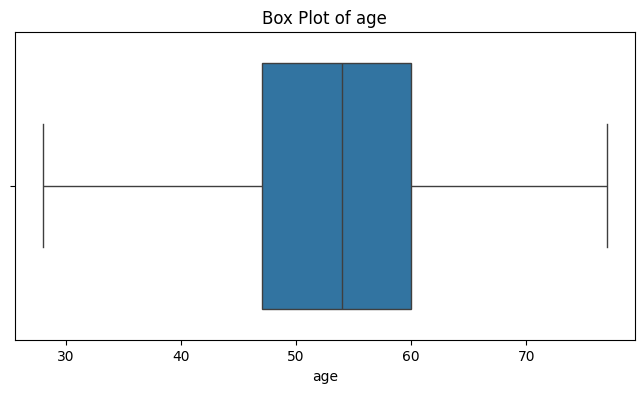


Outliers detected via IQR: 66
IQR Outlier values: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Outliers detected via Z-score: 0


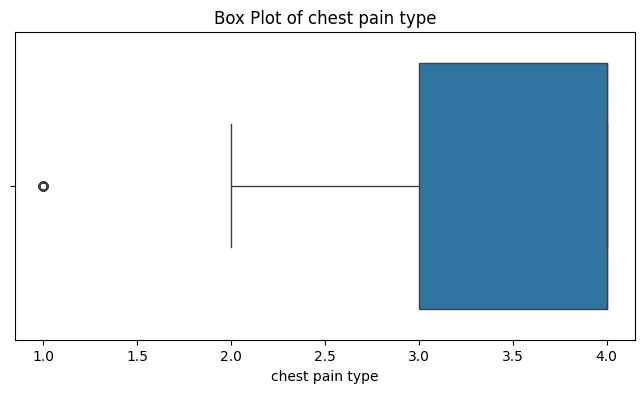


Outliers detected via IQR: 37
IQR Outlier values: [190 180 180 180 200 180 180 180  80 200 185 200 180 180   0 178 172 180
 190 174 178 180 200 192 178 180 180 172 172 180 200 174 178 192 180 178
 180]
Outliers detected via Z-score: 10
Z-score Outlier values: [190 200 200 200   0 190 200 192 200 192]


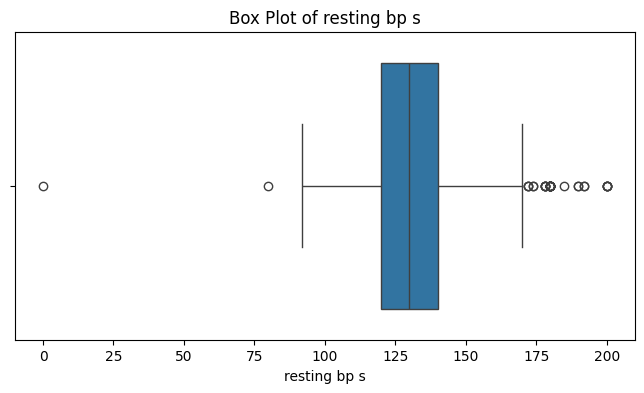


Outliers detected via IQR: 193
IQR Outlier values: [468 518 412 529 466 393 603 404 491 394   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 458   0   0   0
   0   0   0 564 407 417 409 394 417 407 564 394 409]
Outliers detected via Z-score: 5
Z-score Outlier values: [518 529 603 564 564]


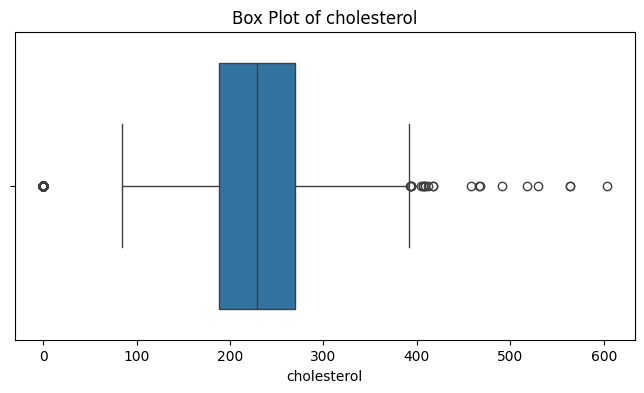


Outliers detected via IQR: 0
Outliers detected via Z-score: 0


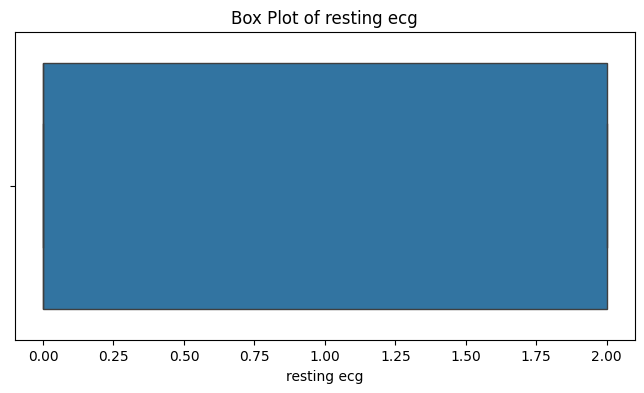


Outliers detected via IQR: 1
IQR Outlier values: [60]
Outliers detected via Z-score: 2
Z-score Outlier values: [63 60]


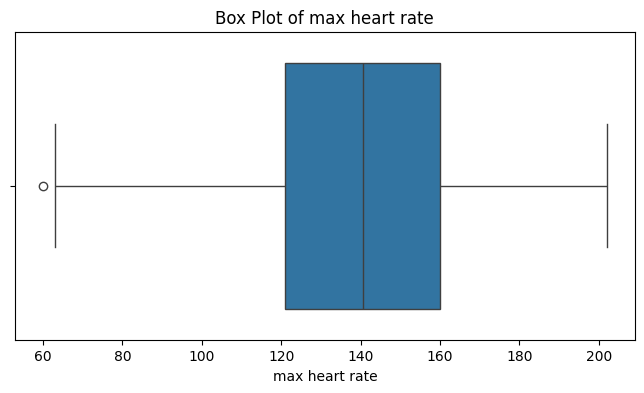


Outliers detected via IQR: 0
Outliers detected via Z-score: 0


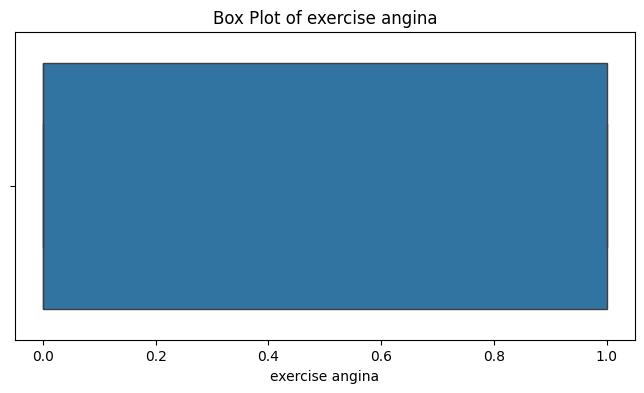


Outliers detected via IQR: 11
IQR Outlier values: [ 5.  -2.6  4.2  5.6  4.2  6.2  6.2  5.6  4.2  4.2  4.4]
Outliers detected via Z-score: 11
Z-score Outlier values: [ 5.  -2.6  4.2  5.6  4.2  6.2  6.2  5.6  4.2  4.2  4.4]


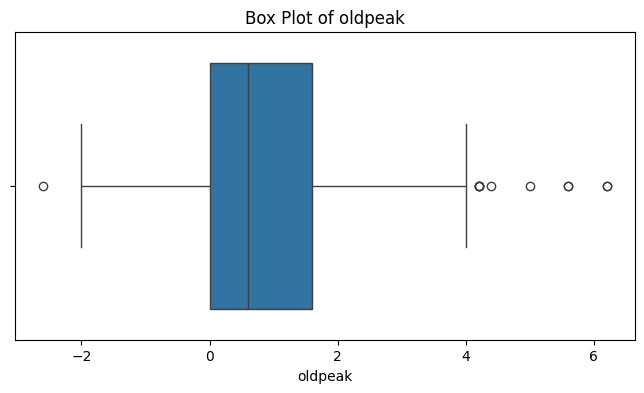


Outliers detected via IQR: 0
Outliers detected via Z-score: 0


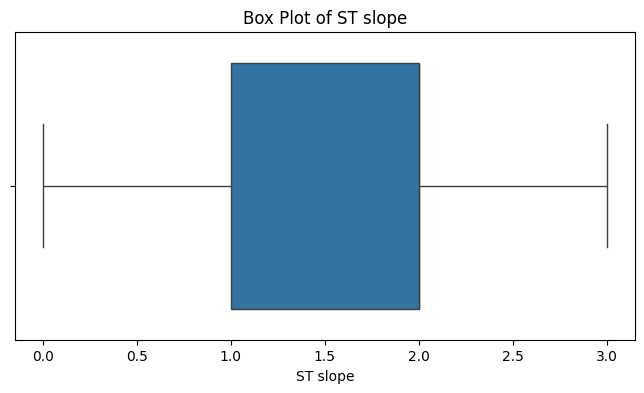

In [39]:
numeric_columns = ['age', 'chest pain type', 'resting bp s', 'cholesterol', 'resting ecg',
                   'max heart rate', 'exercise angina', 'oldpeak', 'ST slope']

for col in numeric_columns:

    # IQR Method
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_iqr = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nOutliers detected via IQR: {len(outliers_iqr)}")
    if not outliers_iqr.empty:
        print("IQR Outlier values:", outliers_iqr[col].values)

    # Z-Score Method
    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
    outliers_zscore = df[z_scores > 3]
    print(f"Outliers detected via Z-score: {len(outliers_zscore)}")
    if not outliers_zscore.empty:
        print("Z-score Outlier values:", outliers_zscore[col].values)

    # Box Plot Visualization
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

In [40]:
# Using IQR to remove outliers
cleaned_df = df.copy()

for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter out outliers
    cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]

print(f"Original rows: {len(df)}, Cleaned rows: {len(cleaned_df)}")

Original rows: 1190, Cleaned rows: 902


In [41]:
# Split for final evaluation
test_size = 0.2
random_state = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [42]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((952, 11), (952,), (238, 11), (238,))

In [43]:
from sklearn.preprocessing import StandardScaler
import joblib

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save the scaler to a file
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

# Baseline SVM

In [44]:
# Dictionary to store results
svc_results = {}

# Define and train the model
svm = SVC()
t0 = time.time()
svm.fit(X_train, y_train)
t1 = time.time()

# Predict and store accuracy and time
y_pred = svm.predict(X_test)
svc_results['svm'] = {
    'accuracy': accuracy_score(y_test, y_pred),
    'time': t1 - t0
}

# Save the trained model to a file
joblib.dump(svm, 'Base_model.pkl')

# Show results
svc_results


{'svm': {'accuracy': 0.8445378151260504, 'time': 0.0292816162109375}}

# SVM with GridSearch

In [45]:
from sklearn.metrics import accuracy_score
import joblib
import time
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10, 20, 30, 50],
    'gamma': ['scale', 'auto']
}

gridsearch_result = {}

grid = GridSearchCV(SVC(), param_grid, cv=5)
t0 = time.time()
grid.fit(X_train, y_train)
t1 = time.time()
y_pred_grid = grid.predict(X_test)
gridsearch_result['grid'] = {
    'accuracy': accuracy_score(y_test, y_pred_grid),
    'time': t1 - t0
}

# Save best model
joblib.dump(grid.best_estimator_, 'GridSearch_best_model.pkl')

# Print best hyperparameters and accuracy
print("Best Hyperparameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)
print("Test Accuracy:", gridsearch_result['grid']['accuracy'])
print("Training Time (s):", gridsearch_result['grid']['time'])


Best Hyperparameters: {'C': 20, 'gamma': 'auto'}
Best Cross-Validation Score: 0.8697161752548912
Test Accuracy: 0.9033613445378151
Training Time (s): 2.1573855876922607


In [46]:
import numpy as np

def bfo_optimize(
    obj_func, bounds,
    n_bacteria=30,
    n_chem=15,
    n_reprod=4,
    n_elim=2,
    ped=0.2,
    step_size=0.05,
    Ns=4,                # max swim steps
):
    dim = len(bounds)
    lb = np.array([b[0] for b in bounds])
    ub = np.array([b[1] for b in bounds])

    # 1) Initialize population and evaluate
    pop = np.random.uniform(lb, ub, (n_bacteria, dim))
    fitness = np.array([obj_func(p) for p in pop])

    # Health accumulator
    health = np.zeros(n_bacteria)

    # Track global best
    best_idx = np.argmin(fitness)
    best_sol, best_cost = pop[best_idx].copy(), fitness[best_idx]

    # 2) Elimination–Dispersal Loop
    for _ in range(n_elim):
        # 3) Reproduction Loop
        for _ in range(n_reprod):
            # 4) Chemotaxis Loop
            health[:] = 0
            for _ in range(n_chem):
                for i in range(n_bacteria):
                    # Tumble: random direction
                    delta = np.random.randn(dim)
                    delta /= np.linalg.norm(delta)

                    # Compute cost at current position
                    current_cost = fitness[i]

                    # Swim up to Ns steps
                    swim_count = 0
                    while swim_count < Ns:
                        candidate = np.clip(pop[i] + step_size * delta, lb, ub)
                        cand_cost = obj_func(candidate)
                        if cand_cost < current_cost:
                            # Accept move
                            pop[i] = candidate
                            fitness[i] = cand_cost
                            current_cost = cand_cost
                            swim_count += 1
                        else:
                            break

                    # Accumulate health (lower cost → healthier)
                    health[i] += current_cost

                    # Update global best
                    if current_cost < best_cost:
                        best_cost = current_cost
                        best_sol = pop[i].copy()

            # 5) Reproduction: sort BY HEALTH (ascending)
            idx = np.argsort(health)
            survivors = pop[idx[:n_bacteria//2]]
            pop = np.vstack((survivors, survivors))
            fitness = np.array([obj_func(p) for p in pop])
            # Reset health for next reproduction
            health[:] = 0

        # 6) Elimination–Dispersal: randomly re-initialize some bacteria
        for i in range(n_bacteria):
            if np.random.rand() < ped:
                pop[i] = np.random.uniform(lb, ub)
                fitness[i] = obj_func(pop[i])
                if fitness[i] < best_cost:
                    best_cost = fitness[i]
                    best_sol = pop[i].copy()

    return best_sol, best_cost

In [47]:
def aco_discrete(
    distance_matrix, 
    n_ants=10, 
    n_best=3, 
    n_iterations=100, 
    decay=0.95, 
    alpha=1, 
    beta=2
):
    n_nodes = len(distance_matrix)
    # Initialize pheromone matrix
    pheromone = np.ones((n_nodes, n_nodes)) / n_nodes
    best_path = None
    best_cost = float('inf')

    for _ in range(n_iterations):
        all_paths = []
        all_costs = []

        # ——— 1) Construct paths ———
        for _ in range(n_ants):
            path = []
            visited = set()
            current_node = np.random.randint(n_nodes)
            path.append(current_node)
            visited.add(current_node)

            for _ in range(n_nodes - 1):
                # Compute probabilities for next node
                unvisited = [node for node in range(n_nodes) if node not in visited]
                pheromone_levels = pheromone[current_node, unvisited]
                visibility = 1 / distance_matrix[current_node, unvisited]
                probabilities = (pheromone_levels ** alpha) * (visibility ** beta)
                probabilities /= probabilities.sum()
                next_node = np.random.choice(unvisited, p=probabilities)
                path.append(next_node)
                visited.add(next_node)
                current_node = next_node

            # Compute cost of the path
            cost = sum(distance_matrix[path[i], path[(i+1) % n_nodes]] for i in range(n_nodes))
            all_paths.append(path)
            all_costs.append(cost)

        # ——— 2) Update best solution ———
        idx = np.argmin(all_costs)
        if all_costs[idx] < best_cost:
            best_cost = all_costs[idx]
            best_path = all_paths[idx]

        # ——— 3) Pheromone evaporation ———
        pheromone *= decay

        # ——— 4) Deposit pheromone ———
        elite_indices = np.argsort(all_costs)[:n_best]
        for idx in elite_indices:
            path = all_paths[idx]
            cost = all_costs[idx]
            for i in range(n_nodes):
                from_node = path[i]
                to_node = path[(i+1) % n_nodes]
                pheromone[from_node, to_node] += 1 / cost  

    return best_path, best_cost

In [48]:
import numpy as np

def de_optimize(obj_func, bounds, pop_size=30, F=0.8, CR=0.7, n_gen=50):
    dim = len(bounds)
    lb = np.array([b[0] for b in bounds])
    ub = np.array([b[1] for b in bounds])

    # Initialize population
    pop = np.random.uniform(lb, ub, (pop_size, dim))
    fitness = np.array([obj_func(ind) for ind in pop])
    
    # Track best solution
    best_idx = np.argmin(fitness)
    best_sol = pop[best_idx].copy()
    best_cost = fitness[best_idx]

    # Main loop
    for _ in range(n_gen):
        new_pop = np.copy(pop)
        new_fitness = np.copy(fitness)
        
        for i in range(pop_size):
            # Select three distinct individuals (excluding current)
            idxs = [idx for idx in range(pop_size) if idx != i]
            a, b, c = pop[np.random.choice(idxs, 3, replace=False)]
            
            # Mutation: DE/rand/1
            mutant = a + F * (b - c)
            mutant = np.clip(mutant, lb, ub)
            
            # Crossover
            cross_points = np.random.rand(dim) < CR
            if not np.any(cross_points):  # Ensure at least one crossover
                cross_points[np.random.randint(dim)] = True
            trial = np.where(cross_points, mutant, pop[i])
            
            # Evaluate trial
            f = obj_func(trial)
            
            # Selection
            if f < fitness[i]:
                new_pop[i] = trial
                new_fitness[i] = f
                if f < best_cost:
                    best_cost = f
                    best_sol = trial.copy()
        
        # Update population for next generation
        pop = new_pop
        fitness = new_fitness

    return best_sol, best_cost

In [49]:
import numpy as np

def ga_optimize(obj_func, bounds, pop_size=30, n_gen=50, cx_pb=0.8, mut_pb=0.2, mut_sigma=0.1):
    dim = len(bounds)
    lb = np.array([b[0] for b in bounds])
    ub = np.array([b[1] for b in bounds])

    # Initialize population
    pop = np.random.uniform(lb, ub, (pop_size, dim))
    fitness = np.array([obj_func(ind) for ind in pop])
    
    # Track best solution
    best_idx = np.argmin(fitness)
    best_sol = pop[best_idx].copy()
    best_cost = fitness[best_idx]

    for _ in range(n_gen):
        # Tournament selection (k=2)
        idx = np.random.randint(0, pop_size, (pop_size, 2))
        winners = [pop[a] if fitness[a] < fitness[b] else pop[b] for a, b in idx]
        
        # Crossover
        children = []
        for i in range(0, pop_size, 2):
            p1, p2 = winners[i], winners[i+1]
            if np.random.rand() < cx_pb:
                pt = np.random.randint(1, dim)
                c1 = np.concatenate((p1[:pt], p2[pt:]))
                c2 = np.concatenate((p2[:pt], p1[pt:]))
            else:
                c1, c2 = p1.copy(), p2.copy()
            children.extend([c1, c2])
        
        # Mutation
        children = np.array(children)
        for i in range(pop_size):
            if np.random.rand() < mut_pb:
                children[i] += mut_sigma * np.random.randn(dim)
                children[i] = np.clip(children[i], lb, ub)
        
        # Evaluate offspring
        child_fitness = np.array([obj_func(ind) for ind in children])
        
        # Replace entire population with offspring (generational replacement)
        pop = children
        fitness = child_fitness
        
        # Update best solution
        curr_best_idx = np.argmin(fitness)
        if fitness[curr_best_idx] < best_cost:
            best_cost = fitness[curr_best_idx]
            best_sol = pop[curr_best_idx].copy()
    
    return best_sol, best_cost

In [50]:
def abc_optimize(obj_func, bounds, n_food=30, n_iter=50, limit=10):
    dim = len(bounds)
    lb = np.array([b[0] for b in bounds]); ub = np.array([b[1] for b in bounds])
    foods = np.random.uniform(lb, ub, (n_food, dim))
    fitness = np.array([obj_func(f) for f in foods])
    trial = np.zeros(n_food)
    for _ in range(n_iter):
        # employed bees
        for i in range(n_food):
            k = np.random.choice([j for j in range(n_food) if j!=i])
            phi = np.random.randn(dim)
            cand = np.clip(foods[i] + phi*(foods[i]-foods[k]), lb, ub)
            f = obj_func(cand)
            if f < fitness[i]: foods[i], fitness[i] = cand, f; trial[i]=0
            else: trial[i]+=1
        # onlooker bees
        prob = (1/fitness) / np.sum(1/fitness)  
        for _ in range(n_food):
            i = np.random.choice(range(n_food), p=prob)
            k = np.random.choice([j for j in range(n_food) if j!=i])
            phi = np.random.randn(dim)
            cand = np.clip(foods[i] + phi*(foods[i]-foods[k]), lb, ub)
            f = obj_func(cand)
            if f < fitness[i]: foods[i], fitness[i], trial[i] = cand, f, 0
            else: trial[i]+=1
        # scout bees
        for i in range(n_food):
            if trial[i] > limit:
                foods[i] = np.random.uniform(lb, ub)
                fitness[i] = obj_func(foods[i]); trial[i]=0
    best = foods[np.argmin(fitness)]; return best, fitness.min()

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np

# Define discrete sets
C_values = [0.1, 1, 10, 20, 30, 50]
gamma_values = ['scale', 'auto']

# Objective function using index-based access
def objective(params):
    C_idx, gamma_idx = params
    C = C_values[int(C_idx)]
    gamma = gamma_values[int(gamma_idx)]
    
    svc = SVC(C=C, gamma=gamma)
    score = cross_val_score(svc, X_train, y_train, cv=5, scoring='accuracy').mean()
    return -score  

# Bounds for index-based search (e.g., with differential evolution)
bounds = [(0, len(C_values) - 1), (0, len(gamma_values) - 1)]


In [ ]:
methods = [bfo_optimize, aco_optimize, de_optimize, ga_optimize, abc_optimize]
results = {}
t0_total = time.time()
for method in methods:
    t0 = time.time()
    params, cost = method(objective, bounds)
    t1 = time.time()
    C_opt, gamma_opt = params[0],params[1]
    results[method.__name__] = {'C':C_opt, 'gamma':gamma_opt, 'CV acc':-cost, 'time':t1-t0}
t1_total = time.time()

In [ ]:
for name, res in results.items():
    print(f"{name}: C={res['C']:.4f}, gamma={res['gamma']:.6f}, CV acc={res['CV acc']:.4f}, time={res['time']:.2f}s")

bfo_optimize: C=3.9330, gamma=0.538968, CV acc=0.8687, time=635.48s
aco_optimize: C=3.5354, gamma=1.000000, CV acc=0.8697, time=273.83s
de_optimize: C=3.9164, gamma=1.000000, CV acc=0.8697, time=279.57s
ga_optimize: C=3.8397, gamma=1.000000, CV acc=0.8697, time=276.93s
abc_optimize: C=3.3146, gamma=1.000000, CV acc=0.8697, time=545.10s


In [ ]:
best_method = max(results, key=lambda k: results[k]['CV acc'])
bm = results[best_method]
svc = SVC(C=bm['C'], gamma=bm['gamma'])
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(f"\nBest: {best_method} → Test accuracy={accuracy_score(y_test,y_pred):.4f}")


Best: aco_optimize → Test accuracy=0.8655


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import time
import joblib

# Dictionary to store results
svc_results = {}
# Dictionary mapping algorithm names to their respective parameters
param_dict = {
    "bfo_optimize": {"C": 3.9330, "gamma": 0.538968},
    "aco_optimize": {"C": 3.5354, "gamma": 1.000000},
    "de_optimize":  {"C": 3.9164, "gamma": 1.000000},
    "ga_optimize":  {"C": 3.8397, "gamma": 1.000000},
    "abc_optimize": {"C": 3.3146, "gamma": 1.000000},
}

# Train and save a model for each set of parameters
for algo_name, params in param_dict.items():
    svm = SVC(C=params["C"], gamma=params["gamma"])
    
    t0 = time.time()
    svm.fit(X_train, y_train)
    t1 = time.time()

    y_pred = svm.predict(X_test)
    svc_results[algo_name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'time': t1 - t0
    }

    # Save the trained model with a filename matching the algorithm name
    model_filename = f"Models/{algo_name}_svm_model.pkl"
    joblib.dump(svm, model_filename)

# Show results
svc_results


{'bfo_optimize': {'accuracy': 0.8865546218487395,
  'time': 0.061206817626953125},
 'aco_optimize': {'accuracy': 0.865546218487395, 'time': 0.046846866607666016},
 'de_optimize': {'accuracy': 0.865546218487395, 'time': 0.04880094528198242},
 'ga_optimize': {'accuracy': 0.865546218487395, 'time': 0.046906471252441406},
 'abc_optimize': {'accuracy': 0.865546218487395, 'time': 0.04948687553405762}}

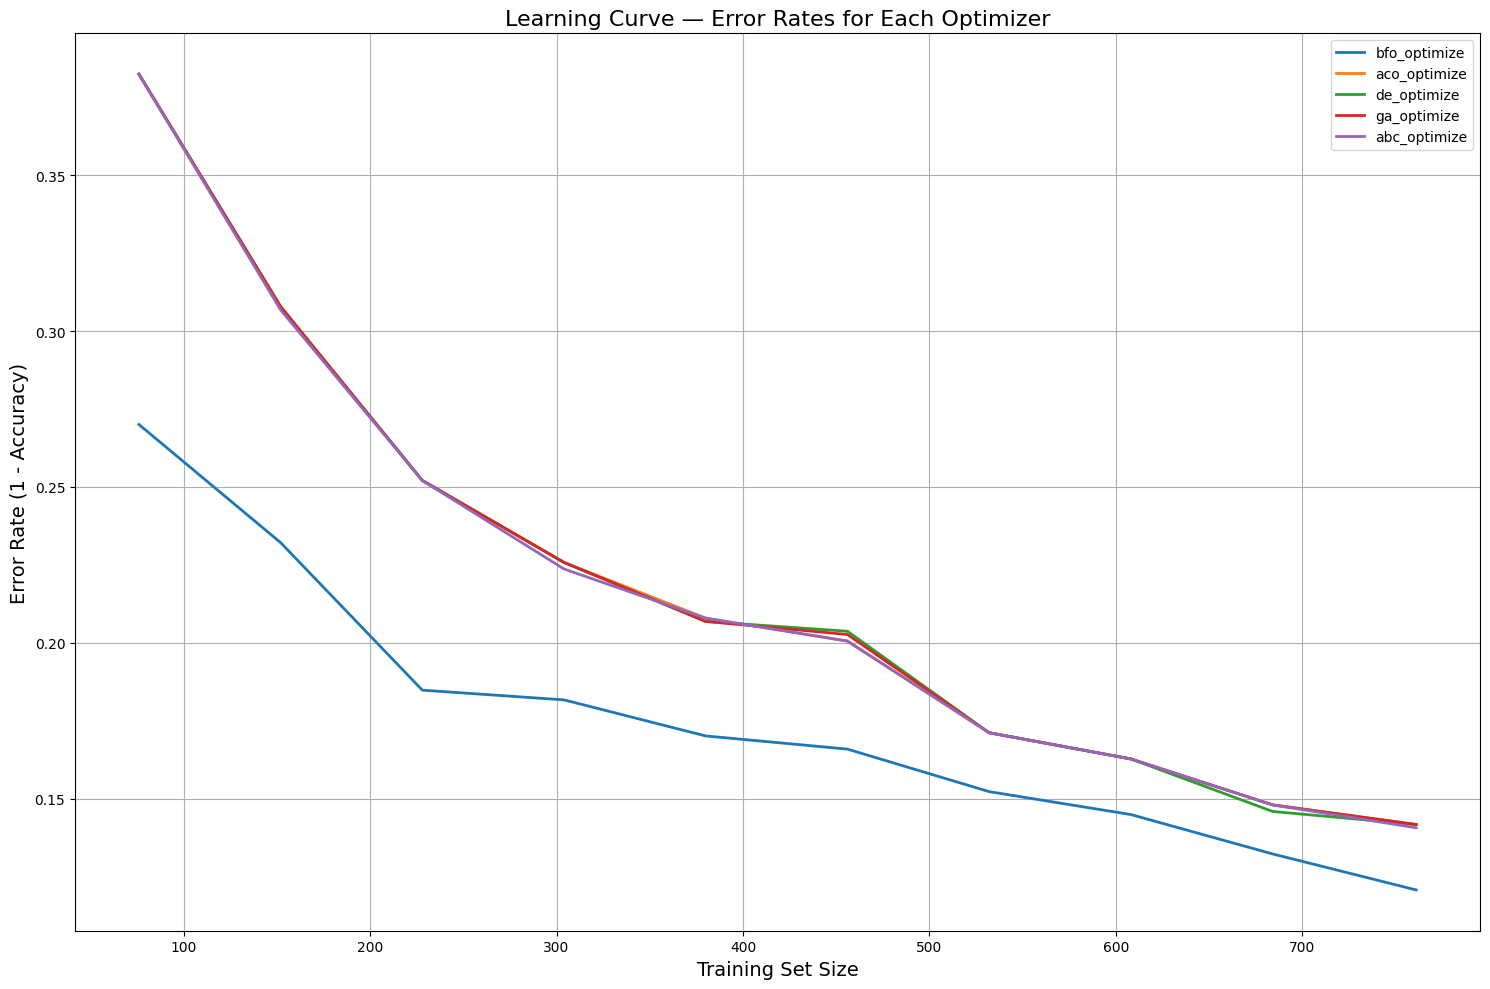

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

# Parameter dictionary
param_dict = {
    "bfo_optimize": {"C": 3.9330, "gamma": 0.538968},
    "aco_optimize": {"C": 3.5354, "gamma": 1.000000},
    "de_optimize":  {"C": 3.9164, "gamma": 1.000000},
    "ga_optimize":  {"C": 3.8397, "gamma": 1.000000},
    "abc_optimize": {"C": 3.3146, "gamma": 1.000000},
}
# Plot setup
plt.figure(figsize=(15, 10))

# Loop through each optimizer
for i, (algo_name, params) in enumerate(param_dict.items()):
    model = SVC(C=params['C'], gamma=params['gamma'])

    # Generate learning curve data
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )

    # Calculate error rates
    train_errors = 1 - np.mean(train_scores, axis=1)
    test_errors = 1 - np.mean(test_scores, axis=1)

    # Plotting
    plt.plot(train_sizes, test_errors, label=f'{algo_name}', linewidth=2)

# Plot formatting
plt.title('Learning Curve — Error Rates for Each Optimizer', fontsize=16)
plt.xlabel('Training Set Size', fontsize=14)
plt.ylabel('Error Rate (1 - Accuracy)', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


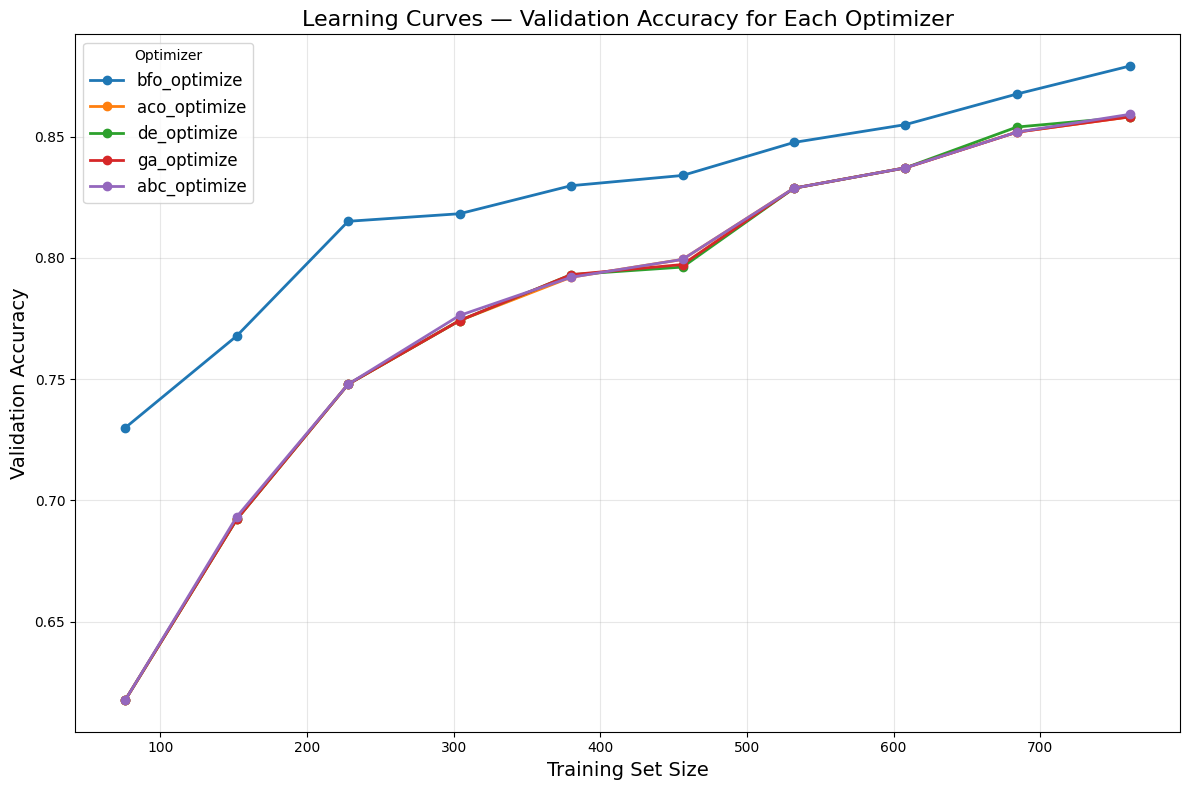

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

# Parameter dictionary
param_dict = {
    "bfo_optimize": {"C": 3.9330, "gamma": 0.538968},
    "aco_optimize": {"C": 3.5354, "gamma": 1.000000},
    "de_optimize":  {"C": 3.9164, "gamma": 1.000000},
    "ga_optimize":  {"C": 3.8397, "gamma": 1.000000},
    "abc_optimize": {"C": 3.3146, "gamma": 1.000000},
}

plt.figure(figsize=(12, 8))

for algo_name, params in param_dict.items():
    svc = SVC(C=params['C'], gamma=params['gamma'])

    # learning_curve returns train_scores and test_scores (accuracy by fold)
    train_sizes, train_scores, test_scores = learning_curve(
        svc, X_train, y_train,
        cv=5,
        scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 10),
        n_jobs=-1
    )

    # mean validation accuracy across folds
    test_mean_acc = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, test_mean_acc,
             label=algo_name,
             linewidth=2,
             marker='o')

plt.title('Learning Curves — Validation Accuracy for Each Optimizer', fontsize=16)
plt.xlabel('Training Set Size', fontsize=14)
plt.ylabel('Validation Accuracy', fontsize=14)
plt.legend(title='Optimizer', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
svc_best = svc
train_sizes, train_scores, val_scores = learning_curve(
    svc_best, X_train, y_train, cv=5, train_sizes=np.linspace(0.1,1.0,10), scoring='accuracy'
)

train_err = 1 - np.mean(train_scores,axis=1)
val_err = 1 - np.mean(val_scores,axis=1)

In [ ]:
new_patient = {
    'age': 48,
    'sex': 0,
    'chest pain type': 4,
    'resting bp s': 138,
    'cholesterol': 214,
    'fasting blood sugar': 0,
    'resting ecg': 0,
    'max heart rate': 108,
    'exercise angina': 1,
    'oldpeak': 1.5,
    'ST slope': 2
}
new_df = pd.DataFrame([new_patient])

loaded_scaler = joblib.load('scaler.pkl')
new_X = loaded_scaler.transform(new_df.values)
# Load the model
loaded_model = joblib.load('aco_optimize_svm_model.pkl')
# Predict
prediction = loaded_model.predict(new_X)
print(f"Predicted class for new patient: {prediction[0]}")

FileNotFoundError: [Errno 2] No such file or directory: 'aco_optimize_svm_model.pkl'

In [ ]:
import numpy as np
from scipy.optimize import differential_evolution
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import joblib
import time

# ——— 1) Define your discrete hyperparameter grid ———
C_vals     = [0.1, 1, 10, 20, 30, 50]
gamma_vals = ['scale', 'auto']

# ——— 2) Objective function: negative 5‑fold CV accuracy ———
def objective(params):
    # params = [C_idx, gamma_idx]
    iC = int(np.clip(np.round(params[0]), 0, len(C_vals)-1))
    iG = int(np.clip(np.round(params[1]), 0, len(gamma_vals)-1))
    svc = SVC(C=C_vals[iC], gamma=gamma_vals[iG])
    return -cross_val_score(svc, X_train, y_train, cv=5, scoring='accuracy').mean()

# ——— 3) Global search via DE over the index space ———
bounds = [(0, len(C_vals)-1),    # C index: 0…5
          (0, len(gamma_vals)-1)] # gamma index: 0…1

t0_de = time.time()
result_de = differential_evolution(
    objective,
    bounds,
    strategy='best1bin',
    maxiter=30,
    popsize=20,
    seed=42,
    polish=False
)
t1_de = time.time()

# Map DE’s best back to real hyperparameters
best_iC = int(np.clip(np.round(result_de.x[0]), 0, len(C_vals)-1))
best_iG = int(np.clip(np.round(result_de.x[1]), 0, len(gamma_vals)-1))
best_C  = C_vals[best_iC]
best_g  = gamma_vals[best_iG]
print(f"DE found → C={best_C}, gamma={best_g}, CV acc≈{-result_de.fun:.4f}")
print(f"DE time: {t1_de - t0_de:.2f}s")

# ——— 4) Local refinement via BFO over the full grid (beefed‑up) ———
def bfo_optimize(obj_func, bounds,
                 n_bacteria=50, n_chem=30, n_reprod=4, n_elim=2,
                 ped=0.2, step_size=1.0):
    dim = len(bounds)
    lb = np.array([b[0] for b in bounds])
    ub = np.array([b[1] for b in bounds])
    pop = np.random.uniform(lb, ub, (n_bacteria, dim))
    fitness = np.array([obj_func(p) for p in pop])
    best_idx = np.argmin(fitness)
    best_sol, best_cost = pop[best_idx].copy(), fitness[best_idx]
    for _ in range(n_elim):
        for _ in range(n_reprod):
            for _ in range(n_chem):
                for i in range(n_bacteria):
                    d = np.random.randn(dim)
                    d /= np.linalg.norm(d)
                    cand = np.clip(pop[i] + step_size * d, lb, ub)
                    cost = obj_func(cand)
                    if cost < fitness[i]:
                        pop[i], fitness[i] = cand, cost
                        if cost < best_cost:
                            best_sol, best_cost = cand.copy(), cost
            # reproduction: keep best half and duplicate
            idx_sorted = np.argsort(fitness)
            survivors = pop[idx_sorted[:n_bacteria//2]]
            pop = np.vstack([survivors, survivors])
            fitness = np.hstack([fitness[idx_sorted[:n_bacteria//2]]]*2)
        # elimination‑dispersal
        for i in range(n_bacteria):
            if np.random.rand() < ped:
                new = np.random.uniform(lb, ub)
                pop[i] = new
                fitness[i] = obj_func(new)
                if fitness[i] < best_cost:
                    best_sol, best_cost = new.copy(), fitness[i]
    return best_sol, best_cost

t0_bfo = time.time()
best_idx_sol, best_idx_cost = bfo_optimize(objective, bounds)
t1_bfo = time.time()

# Map BFO’s best back to real hyperparameters
final_iC = int(np.clip(np.round(best_idx_sol[0]), 0, len(C_vals)-1))
final_iG = int(np.clip(np.round(best_idx_sol[1]), 0, len(gamma_vals)-1))
final_C  = C_vals[final_iC]
final_g  = gamma_vals[final_iG]
print(f"BFO refined → C={final_C}, gamma={final_g}, CV acc≈{-best_idx_cost:.4f}")
print(f"BFO time: {t1_bfo - t0_bfo:.2f}s")

# ——— 5) Train final SVC on full training set and evaluate on test ———
final_svc = SVC(C=final_C, gamma=final_g)
final_svc.fit(X_train, y_train)
y_pred = final_svc.predict(X_test)

from sklearn.metrics import accuracy_score
acc_test = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc_test:.4f}")

# ——— 6) Save the final, hybrid-optimized model ———
joblib.dump(final_svc, 'hybrid_DE_BFO_svc_model.pkl')
print("Saved model to 'hybrid_DE_BFO_svc_model.pkl'")


DE found → C=20, gamma=auto, CV acc≈0.8697
DE time: 20.46s
BFO refined → C=20, gamma=auto, CV acc≈0.8697
BFO time: 2048.96s
Test Accuracy: 0.9034
Saved model to 'hybrid_DE_BFO_svc_model.pkl'
